In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from reader import read_data_raw

In [4]:
X, y = read_data_raw()

In [5]:
X.describe()

,xxyy,theta,energy,r,r_plane,S,delta_t,dt_aop,dt_peaks,dtul_asymm,dtapcnt_u,dtapcnt_l
count,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000
mean,1273.871703,29.622139,8.700899,1.299368,-0.043466,7.259867,0.186721,249.567168,6.044590,0.286724,0.841568,0.752716
std,536.354281,10.444713,4.110244,0.490271,0.599999,14.073827,0.223672,157.490137,4.372137,0.164184,1.079914,0.999013
min,106.000000,0.907355,1.254560,0.500004,-3.506910,0.466668,-0.535662,43.873900,0.000000,0.000000,0.000000,0.000000
25%,818.000000,20.494300,5.773280,0.928975,-0.424785,0.939952,0.040517,118.501000,2.000000,0.167787,0.000000,0.000000
50%,1311.000000,30.849200,7.857050,1.247710,-0.037202,2.149190,0.113207,203.793000,5.000000,0.259156,0.000000,0.000000
75%,1712.000000,39.420000,10.764300,1.582985,0.347171,6.577075,0.245352,352.675500,9.000000,0.375132,1.000000,1.000000
max,2412.000000,44.999900,28.414300,4.292280,2.925930,200.865000,3.720110,1065.370000,30.000000,1.080290,9.000000,8.000000


In [6]:
y.describe()

,top_S_all,top_S_mu,bot_S_all,bot_S_mu
count,176271.000000,176271.000000,176271.000000,176271.000000
mean,7.415171,1.590812,7.215169,1.603438
std,14.389841,2.458270,13.906289,2.366168
min,0.000000,0.000000,0.000000,0.000000
25%,0.938132,0.361630,0.931738,0.360813
50%,2.220134,0.758228,2.186882,0.767115
75%,6.755566,1.834311,6.623352,1.852885
max,208.959038,172.451469,234.739387,72.739516


In [7]:
S_all_mean = 0.5 * (y["top_S_all"].to_numpy() + y["bot_S_all"].to_numpy())
S_mu_mean = 0.5 * (y["top_S_mu"].to_numpy() + y["bot_S_mu"].to_numpy())


top_S_all
regression R^2 = {regression.score(x_reg.reshape(-1, 1), y_reg):.3f}, slope = {slope:.3f}
outliers: 24 events
	2008-10-22 10:43:34.697944	1909
	2008-05-25 05:55:00.549212	1612
	2013-05-06 23:25:22.658540	819
	2011-03-06 10:48:16.850442	2018
	2011-06-26 19:22:05.367767	2009
	2013-11-25 13:12:04.203213	1516
	2014-03-18 20:42:25.906935	2009
	2014-08-21 04:31:03.426079	1109
	2014-10-26 19:21:12.685737	920
	2014-10-12 08:18:52.919139	1816
	2009-07-11 15:48:59.232300	1605
	2010-08-22 06:56:51.179092	1312
	2012-03-13 21:16:20.358769	1525
	2014-09-27 11:25:53.511242	604
	2009-07-03 21:43:03.593653	708
	2010-01-26 21:48:46.433953	1909
	2010-01-29 23:33:37.182892	1203
	2012-04-07 22:24:22.216645	2208
	2012-10-02 10:43:21.238577	1822
	2014-06-20 14:07:15.731690	1407
	2008-10-10 22:40:40.403341	1705
	2013-07-26 21:50:58.545588	609
	2013-10-28 05:49:58.388618	1921
	2014-06-09 07:48:16.666049	1119

bot_S_all
regression R^2 = {regression.score(x_reg.reshape(-1, 1), y_reg):.3f}, slope = {sl

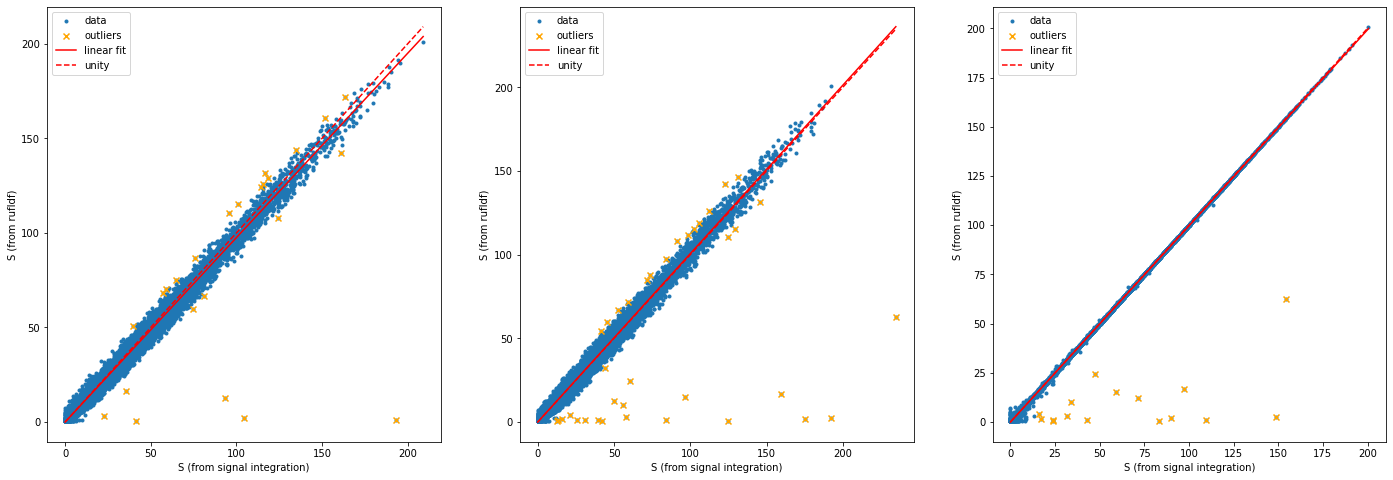

In [11]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(figsize=(24, 8), ncols=3)

y_reg = X["S"].to_numpy()

for ax, param_name, data_override in zip(
    axes,
    ["top_S_all", "bot_S_all", "S_average"],
    [None, None, S_all_mean],
):
    x_reg = data_override if data_override is not None else y[param_name].to_numpy()
    ax.scatter(x_reg, y_reg, marker=".", label="data")

    regression = LinearRegression(fit_intercept=False)
    regression.fit(x_reg.reshape(-1, 1), y_reg)
    slope = regression.coef_[0]
    y_reg_predicted = regression.predict(x_reg.reshape(-1, 1))
    outlier_mask = np.abs(y_reg - y_reg_predicted) > 12

    print(f"\n{param_name}")
    print("regression R^2 = {regression.score(x_reg.reshape(-1, 1), y_reg):.3f}, slope = {slope:.3f}")
    print(f"outliers: {outlier_mask.sum()} events")
    for _, row in X[outlier_mask].iterrows():
        print(f"\t{row['datetime_']}\t{row['xxyy']}")
    
    ax.scatter(x_reg[outlier_mask], y_reg[outlier_mask], marker="x", color='orange', label="outliers")

    x_line_plot = np.array([x_reg.min(), x_reg.max()])
    ax.plot(x_line_plot, regression.predict(x_line_plot.reshape(-1, 1)), color="red", label="linear fit")
    ax.plot(x_line_plot, x_line_plot, color="red", label="unity", linestyle="--")

    ax.legend()
    ax.set_ylabel("S (from rufldf)")
    ax.set_xlabel("S (from signal integration)")
plt.show()

Outlier signals:

```
2008-05-25 05:55:00.549212	1612       DAT002511
2011-03-06 10:48:16.850442	2018       DAT004609
2009-09-08 03:36:20.256331	1214       DAT006312
2010-04-30 04:03:48.429847	2015       DAT006312
2012-11-01 07:41:57.972495	310        DAT006312
2013-10-31 17:23:57.934729	1909       DAT006312
2010-02-22 21:00:52.533877	1820       DAT009707
2011-06-10 22:58:49.178492	1011       DAT010208
2008-12-06 15:29:29.697296	914        DAT012212
2014-09-27 11:25:53.511242	604        DAT012212
2012-09-29 22:18:55.913971	2108       DAT012712
2010-08-07 22:08:28.483836	1522       DAT017710
2014-05-01 15:45:00.582655	505        DAT017710
2008-10-10 22:40:40.403341	1705       DAT018211
2014-06-09 07:48:16.666049	1119
2015-02-06 06:10:53.399840	805

```


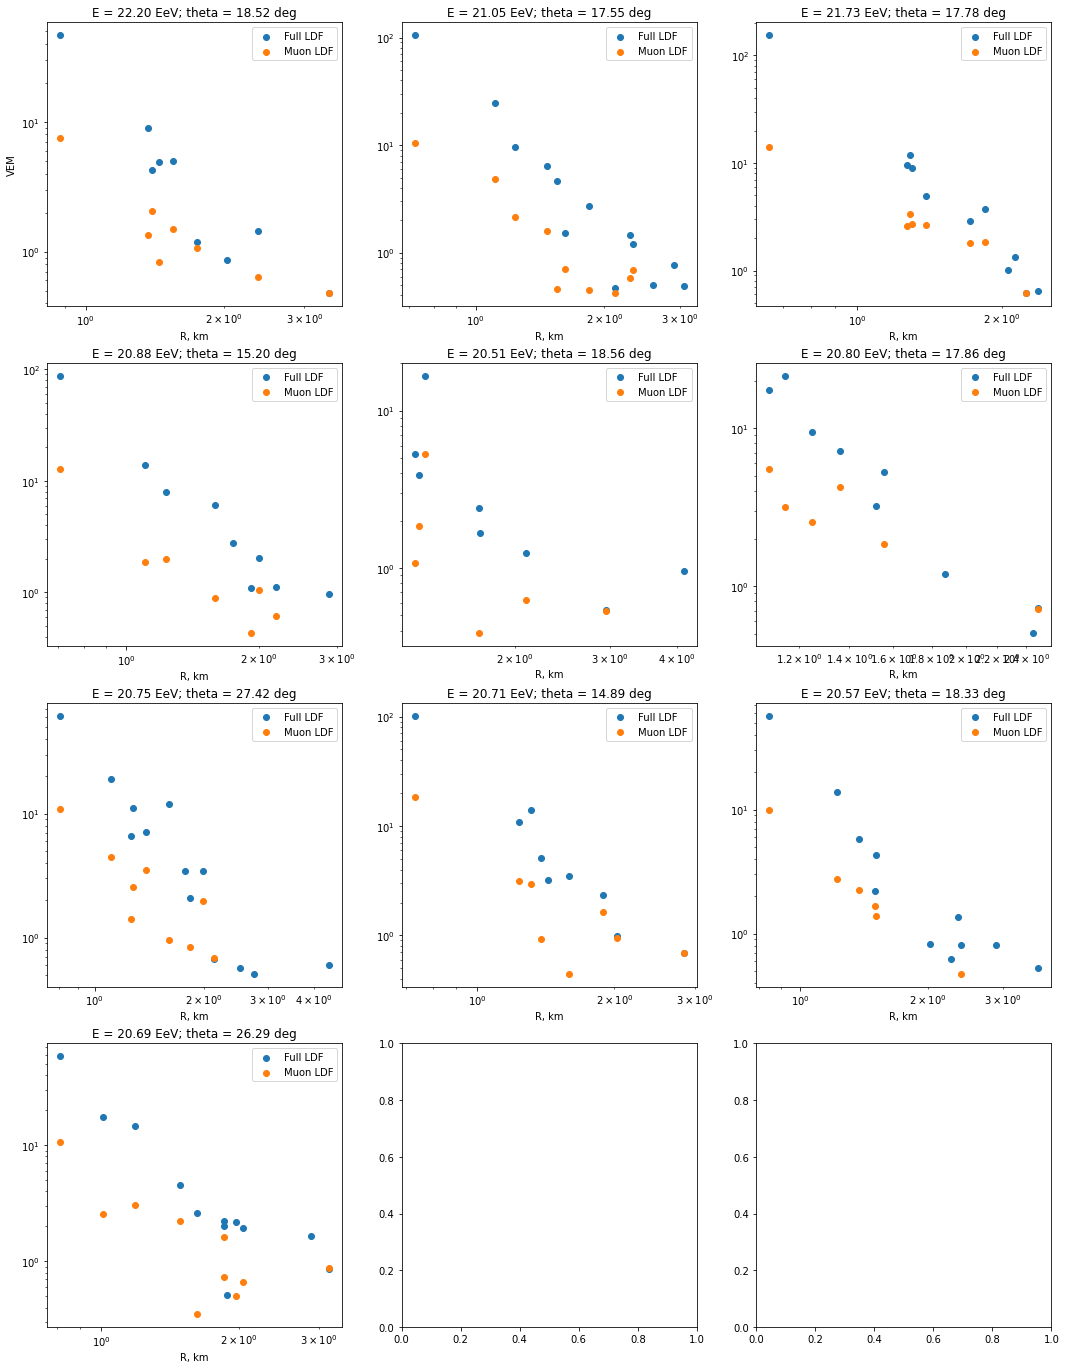

In [20]:
N_EVENTS_TO_PLOT = 10
E_MIN_EEV = 20

n_plots_per_row = 3
n_rows = 1 + N_EVENTS_TO_PLOT // n_plots_per_row
fig, axes = plt.subplots(figsize=(6 * n_plots_per_row, 6 * n_rows), ncols=n_plots_per_row, nrows=n_rows)
axes = axes.flatten()

ylabel_set = False
idx = 0
for datetime_, X_event in X.groupby("datetime_"):
    if idx >= N_EVENTS_TO_PLOT:
        break
    event_energy = X_event['energy'].iloc[0]
    if event_energy < E_MIN_EEV:
        continue
    ax: plt.Axes = axes[idx]
    idx += 1
    ax.scatter(X_event["r"] * 1.2, X_event["S"], label="Full LDF")
    ax.scatter(X_event["r"] * 1.2, S_mu_mean[X_event.index.to_numpy()], label="Muon LDF")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("R, km")
    if not ylabel_set:
        ax.set_ylabel("VEM")
        ylabel_set = True
    ax.set_title(f"E = {event_energy:.2f} EeV; theta = {X_event['theta'].iloc[0]:.2f} deg")
    ax.legend()
